In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
wine = pd.read_csv('/content/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


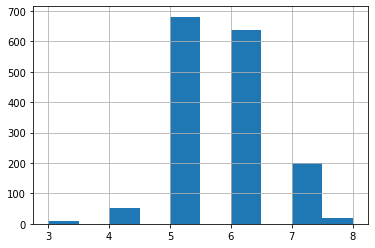

In [6]:
print(wine["quality"].value_counts())
wine["quality"].hist()
plt.show()

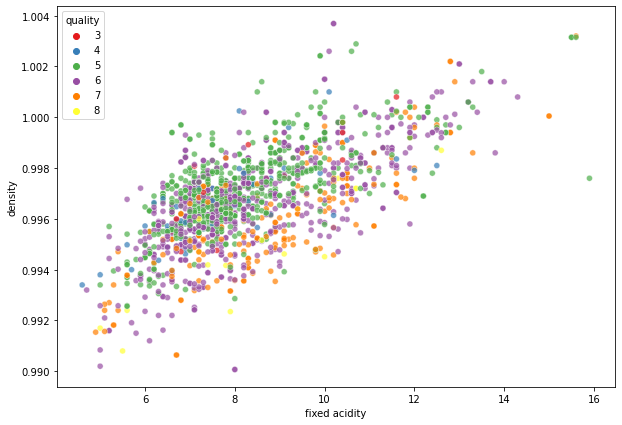

In [21]:
import seaborn as sb
plt.figure(figsize = (10 , 7))
sb.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = wine, alpha = 0.7, palette = "Set1")

In [7]:
from sklearn.preprocessing import StandardScaler


X = wine.drop("quality", axis = 1)
y = wine["quality"]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [12]:
len(X_scaled), len(X_train), len(X_test)

(1599, 1279, 320)

##Creating neural network model

In [34]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

history = model.fit(X_train,y_train, epochs=400,verbose=0)

In [35]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4227 - mae: 0.4227


[0.42266845703125, 0.42266845703125]

Text(0.5, 0, 'epochs')

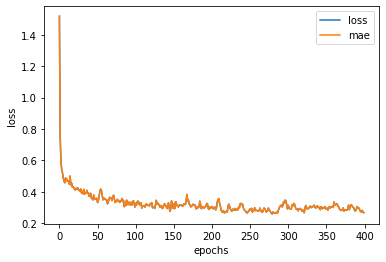

In [36]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
y_pred = model.predict(X_test)
y_pred